<a href="https://colab.research.google.com/github/Hameedhullah/Machine-Learning/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 54.0 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: bokeh
  

In [ ]:
### Implementation of Simple,multiple,lasso,ridge,elastic net Regression

In [ ]:
'''Simple Linear Regression'''

'Simple Linear Regression'

In [ ]:
# Importing the library

import numpy as np
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importing the data

ad_data = pd.read_csv("Advertising.csv")
ad_data.head()

,ID,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# Updating the index in data

ad_data.set_index('ID',inplace = True)
ad_data.sample(6)

,TV,radio,newspaper,sales
ID,,,,
136,48.3,47.0,8.5,11.6
128,80.2,0.0,9.2,8.8
192,75.5,10.8,6.0,9.9
67,31.5,24.6,2.2,9.5
120,19.4,16.0,22.3,6.6
112,241.7,38.0,23.2,21.8


In [ ]:
# Profile of the data

ad_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [ ]:
# Statistical Analysis

ad_data.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [ ]:
# Null values

ad_data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [ ]:
# Duplicates values

ad_data.duplicated().sum()

0

Shape of your Data Set loaded: (200, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    5 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['ID']
To fix these data quality issues in the dataset, import FixDQ fr

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
ID,int64,0.000000,100,1.000000,200.000000,Possible ID column: drop before modeling step.
TV,float64,0.000000,NA,0.700000,296.400000,No issue
radio,float64,0.000000,NA,0.000000,49.600000,No issue
newspaper,float64,0.000000,NA,0.300000,114.000000,Column has 2 outliers greater than upper bound (93.62) or lower than lower bound(-35.78). Cap them or remove them.
sales,float64,0.000000,NA,1.600000,27.000000,No issue


Number of All Scatter Plots = 10


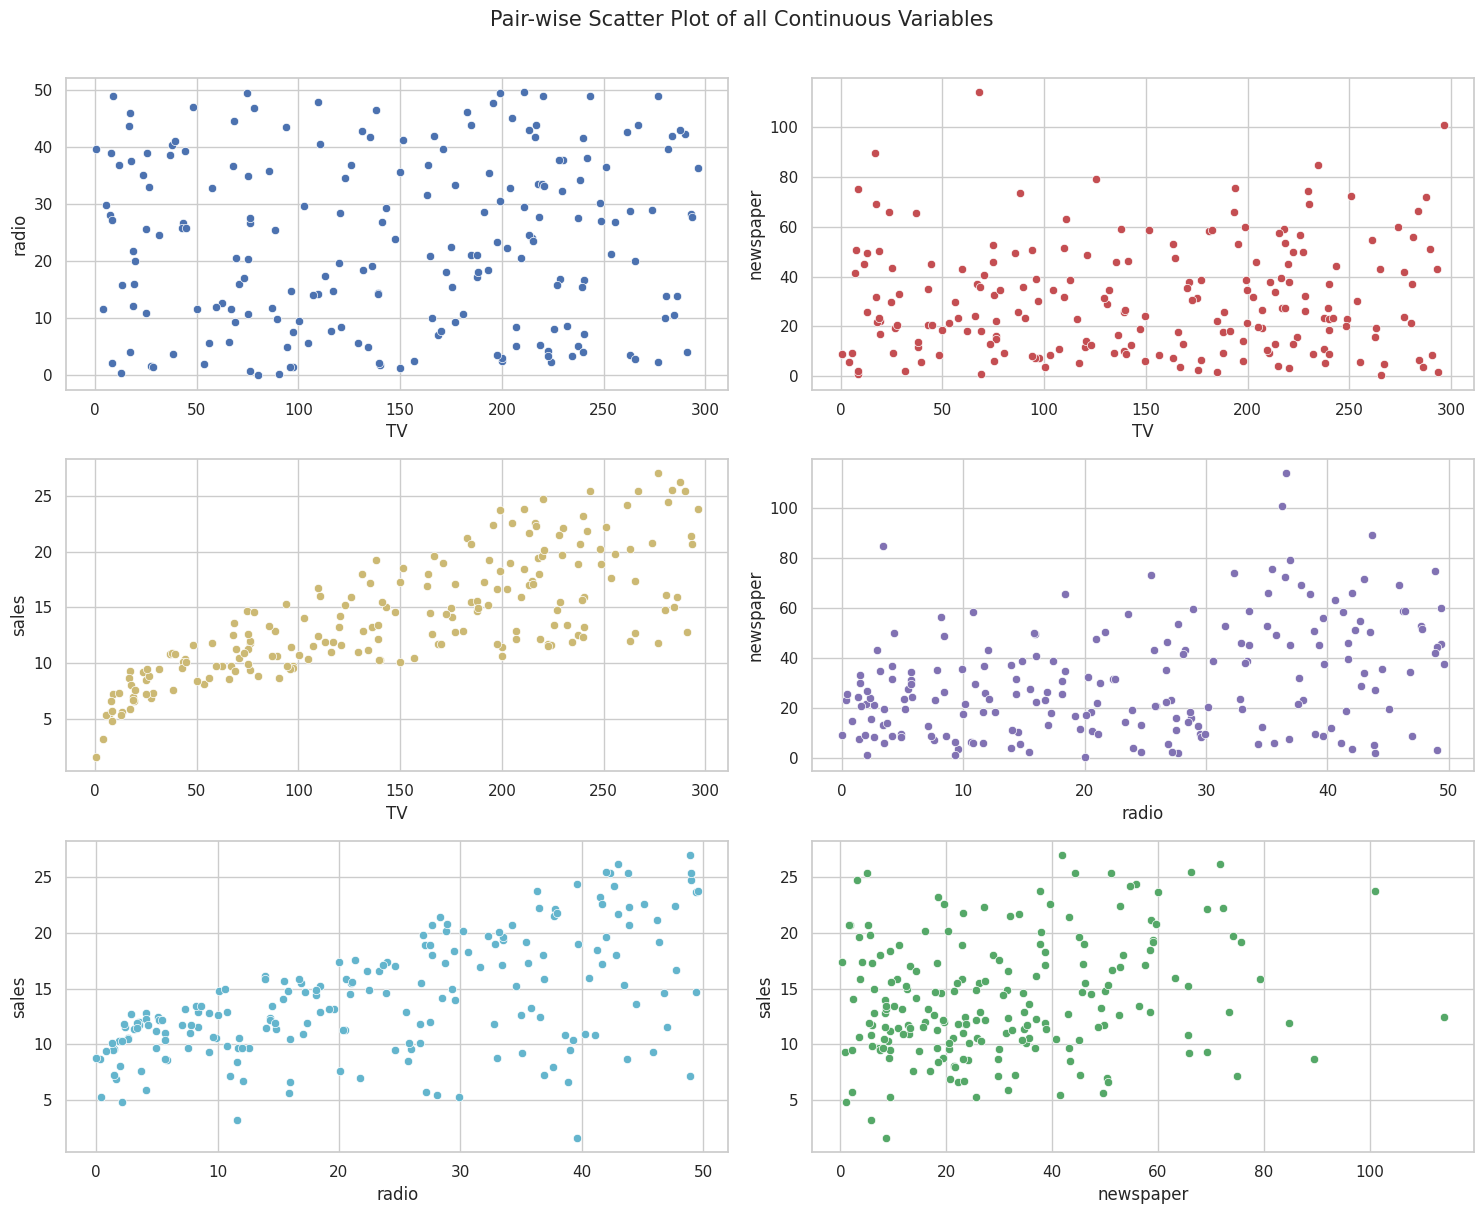

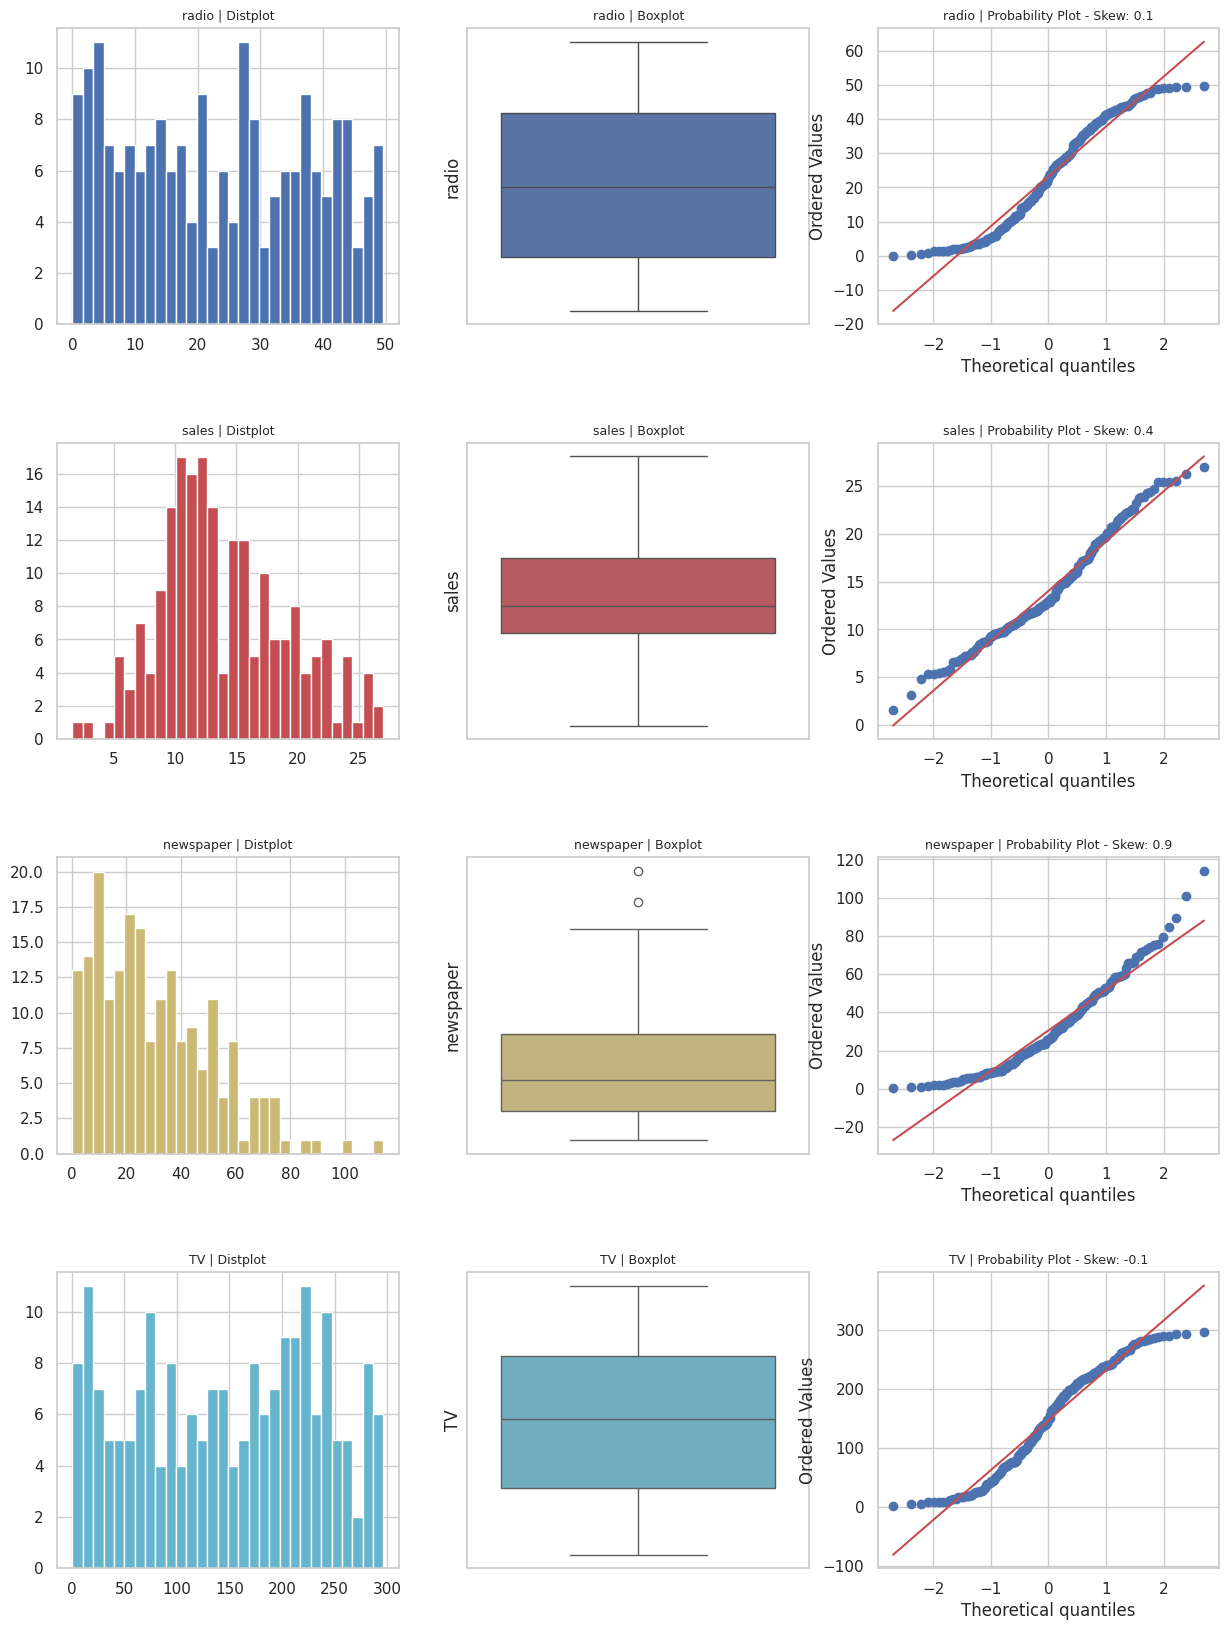

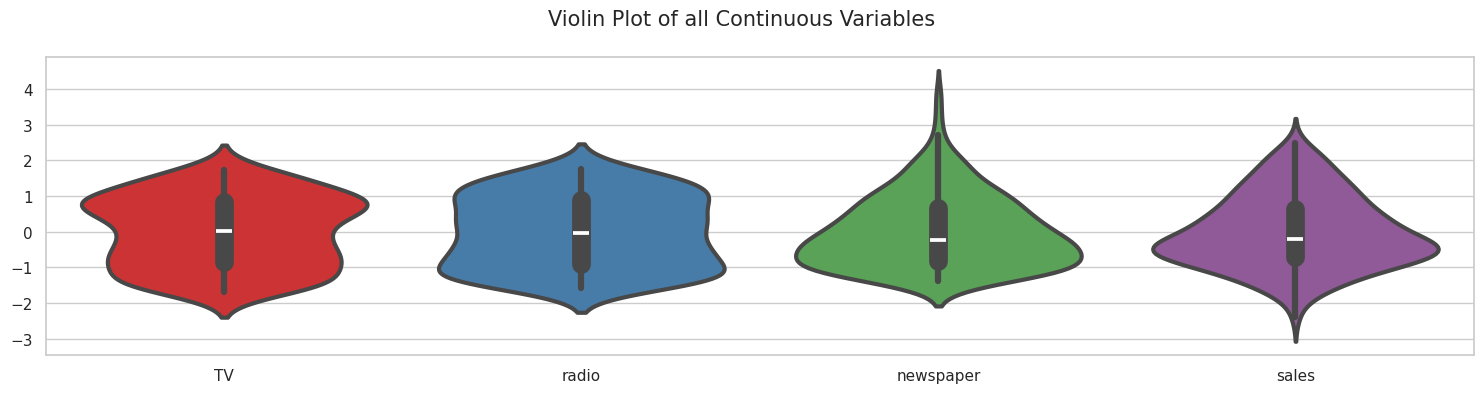

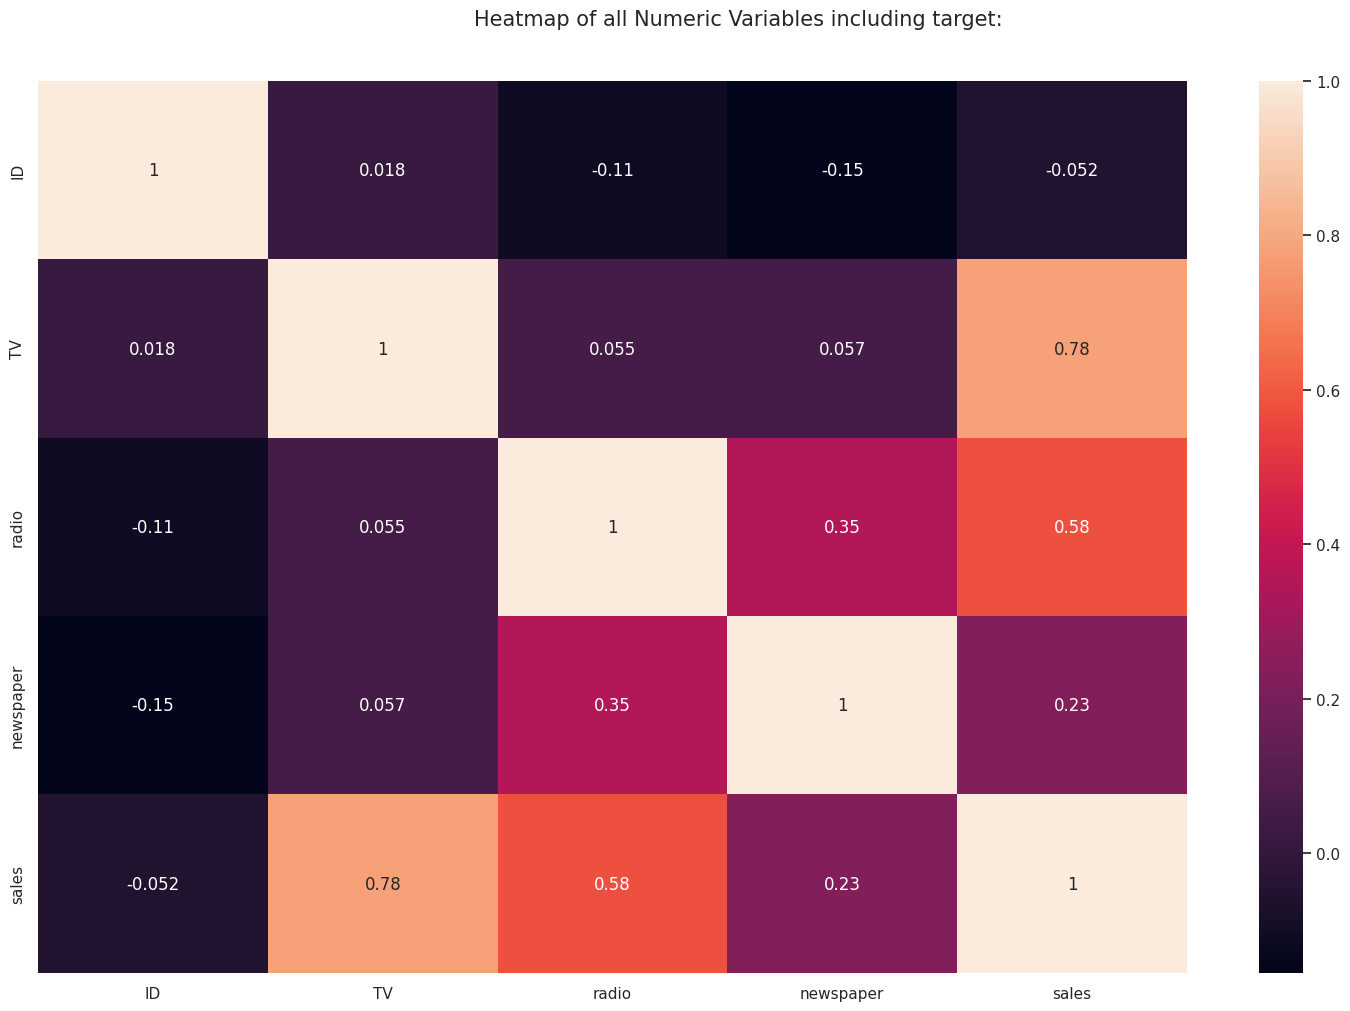

All Plots done
Time to run AutoViz = 4 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
# Graphical Analysis

AV = AutoViz_Class()
df = AV.AutoViz('Advertising.csv')

In [ ]:
# Let split the train and test data (i.e.) dependent and independent variable with simple linear regression

X = ad_data[['TV']] #Independent feature
y = ad_data[['sales']] #Dependent featue


In [ ]:
X.shape, y.shape

((200, 1), (200, 1))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20,random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((160, 1), (40, 1))

In [ ]:
y_train.shape, y_test.shape

((160, 1), (40, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.40424839],
       [ 0.32060772],
       [-1.27051084],
       [-1.04235941],
       [ 0.8791034 ],
       [-1.32873699],
       [-0.94373145],
       [-0.03231403],
       [-0.5397133 ],
       [-0.875999  ],
       [-0.85342151],
       [ 0.21841489],
       [-1.67928215],
       [-1.68997675],
       [-0.87481071],
       [-0.2450177 ],
       [-0.91045937],
       [ 1.65980907],
       [-1.54975868],
       [ 0.56539519],
       [ 1.59564148],
       [ 0.41448252],
       [-0.44108534],
       [-1.49985056],
       [ 1.67169196],
       [-1.55213526],
       [ 1.70615233],
       [-1.56045328],
       [-0.18679156],
       [-1.47846136],
       [-0.58962142],
       [-0.82965574],
       [ 0.45607263],
       [ 0.32060772],
       [-0.28898438],
       [ 0.70798983],
       [-0.08459873],
       [ 0.41448252],
       [ 0.86009078],
       [ 1.0894305 ],
       [-1.57827761],
       [-0.35077539],
       [-0.71676831],
       [ 0.48815642],
       [-0.88550531],
       [ 0

In [ ]:
X_test

array([[ 0.15781217],
       [ 0.53925283],
       [ 1.69783431],
       [-1.64363349],
       [ 0.83513672],
       [-0.89025846],
       [ 0.79354661],
       [-1.18851892],
       [ 0.86009078],
       [ 0.29803023],
       [-1.40835233],
       [-1.11484502],
       [ 1.00387371],
       [-1.71849568],
       [-0.12500054],
       [ 0.23980408],
       [-1.69591819],
       [ 0.56539519],
       [-0.88788188],
       [ 1.03833409],
       [ 0.94445928],
       [-0.97700354],
       [-1.33111357],
       [ 1.19875306],
       [-0.96274407],
       [-1.14692882],
       [ 0.75433309],
       [-0.12737712],
       [-0.74647553],
       [-1.68284702],
       [ 0.59153754],
       [-0.96036749],
       [ 0.58084294],
       [-1.58184248],
       [ 1.55286309],
       [ 1.04784039],
       [-1.20871983],
       [ 1.46968288],
       [-0.38998892],
       [-1.45588388]])

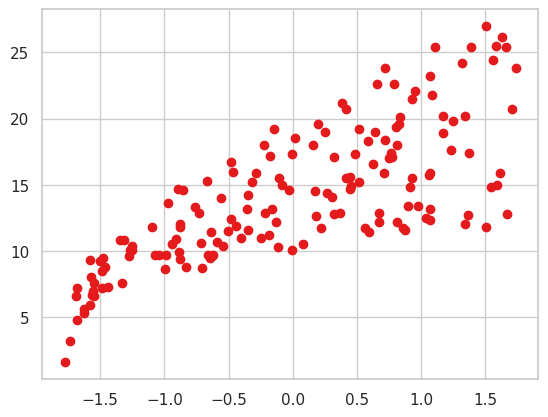

In [ ]:
plt.scatter(X_train,y_train)

In [ ]:
# Model Building

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#Training the train data
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
regressor.intercept_

array([14.1])

In [ ]:
regressor.coef_

array([[3.91569271]])

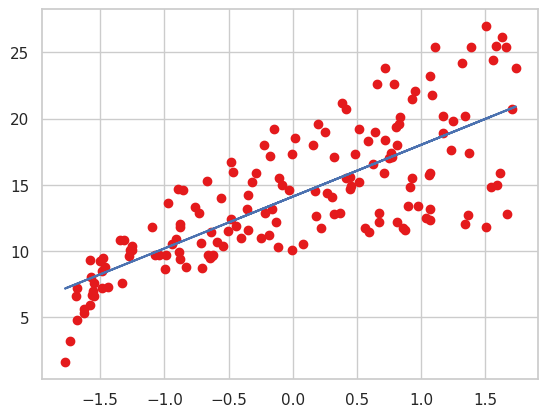

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'b')

In [ ]:
# Predicting the test data

y_pred_test = regressor.predict(X_test)
y_pred_test

array([[14.71794394],
       [16.2115484 ],
       [20.74819743],
       [ 7.66403631],
       [17.37013877],
       [10.61402143],
       [17.2072847 ],
       [ 9.44612512],
       [17.46785121],
       [15.2669948 ],
       [ 8.58532504],
       [ 9.73460946],
       [18.03086098],
       [ 7.37089899],
       [13.61053628],
       [15.03899911],
       [ 7.45930549],
       [16.31391381],
       [10.62332738],
       [18.16579721],
       [17.79821232],
       [10.27435438],
       [ 8.88776831],
       [18.79394862],
       [10.33019006],
       [ 9.60897918],
       [17.05373658],
       [13.60123034],
       [11.17703121],
       [ 7.51048819],
       [16.41627922],
       [10.339496  ],
       [16.37440246],
       [ 7.90599093],
       [20.18053468],
       [18.203021  ],
       [ 9.36702457],
       [19.85482655],
       [12.57292322],
       [ 8.39920611]])

In [ ]:
# Performance Metric

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

10.204654118800955
2.444420003751042
3.194472431998898


In [ ]:
# Accuracy of the data
print("rsquared score")
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
score

rsquared score


0.6766954295627077

In [ ]:
# Adjusted R-Squared score

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6681874145511999

In [ ]:
'''End of Simple Linear Regression'''

'End of Simple Linear Regression'

In [ ]:
'''Multiple Linear Regression'''

'Multiple Linear Regression'

In [ ]:
admission = pd.read_csv("Admission_Prediction.csv")
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [ ]:
# updating the index for better performance in dataset in pandas dataframe

admission.set_index('Serial No.', inplace = True)
admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [ ]:
# Names of Column

admission.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [ ]:
# Updating the column names for better performance in pandas dataframe

admission.columns = admission.columns.str.strip().str.replace(' ', '_')
admission.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [ ]:
 # Profile of the data

 admission.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          485 non-null    float64
 1   TOEFL_Score        490 non-null    float64
 2   University_Rating  485 non-null    float64
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance_of_Admit    500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 35.2 KB


In [ ]:
# Statistical Analysis

admission.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
GRE_Score,485.0,316.558763,11.274704,290.00,308.0000,317.00,325.00,340.00
TOEFL_Score,490.0,107.187755,6.112899,92.00,103.0000,107.00,112.00,120.00
University_Rating,485.0,3.121649,1.146160,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.374000,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.484000,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.576440,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.560000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance_of_Admit,500.0,0.721740,0.141140,0.34,0.6300,0.72,0.82,0.97


In [ ]:
# Null Values

admission.isna().sum()

GRE_Score            15
TOEFL_Score          10
University_Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance_of_Admit       0
dtype: int64

In [ ]:
# list of features which has missing values
features_with_na = [features for features in admission.columns if admission[features].isnull().sum()>1]

# The feature name and the percentage of missing values
for feature in features_with_na:
  print(feature,np.round(admission[feature].isnull().mean(),4), "% missing values")

GRE_Score 0.03 % missing values
TOEFL_Score 0.02 % missing values
University_Rating 0.03 % missing values


In [ ]:
# Duplicates values

admission.duplicated().sum()

0

Shape of your Data Set loaded: (500, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  7
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    9 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Serial No.']
To fix these data quality issues in the dataset, import 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Serial No.,int64,0.000000,100,1.000000,500.000000,Possible ID column: drop before modeling step.
GRE Score,float64,3.000000,NA,290.000000,340.000000,"15 missing values. Impute them with mean, median, mode, or a constant value such as 123."
TOEFL Score,float64,2.000000,NA,92.000000,120.000000,"10 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has a high correlation with ['GRE Score']. Consider dropping one of them."
University Rating,float64,3.000000,NA,1.000000,5.000000,"15 missing values. Impute them with mean, median, mode, or a constant value such as 123."
SOP,float64,0.000000,NA,1.000000,5.000000,No issue
LOR,float64,0.000000,NA,1.000000,5.000000,Column has 1 outliers greater than upper bound (5.50) or lower than lower bound(1.50). Cap them or remove them.
CGPA,float64,0.000000,NA,6.800000,9.920000,"Column has a high correlation with ['GRE Score', 'TOEFL Score']. Consider dropping one of them."
Research,int64,0.000000,0,0.000000,1.000000,No issue
Chance of Admit,float64,0.000000,NA,0.340000,0.970000,"Column has 2 outliers greater than upper bound (1.10) or lower than lower bound(0.35). Cap them or remove them., Column has a high correlation with ['GRE Score', 'CGPA']. Consider dropping one of them."


Number of All Scatter Plots = 28


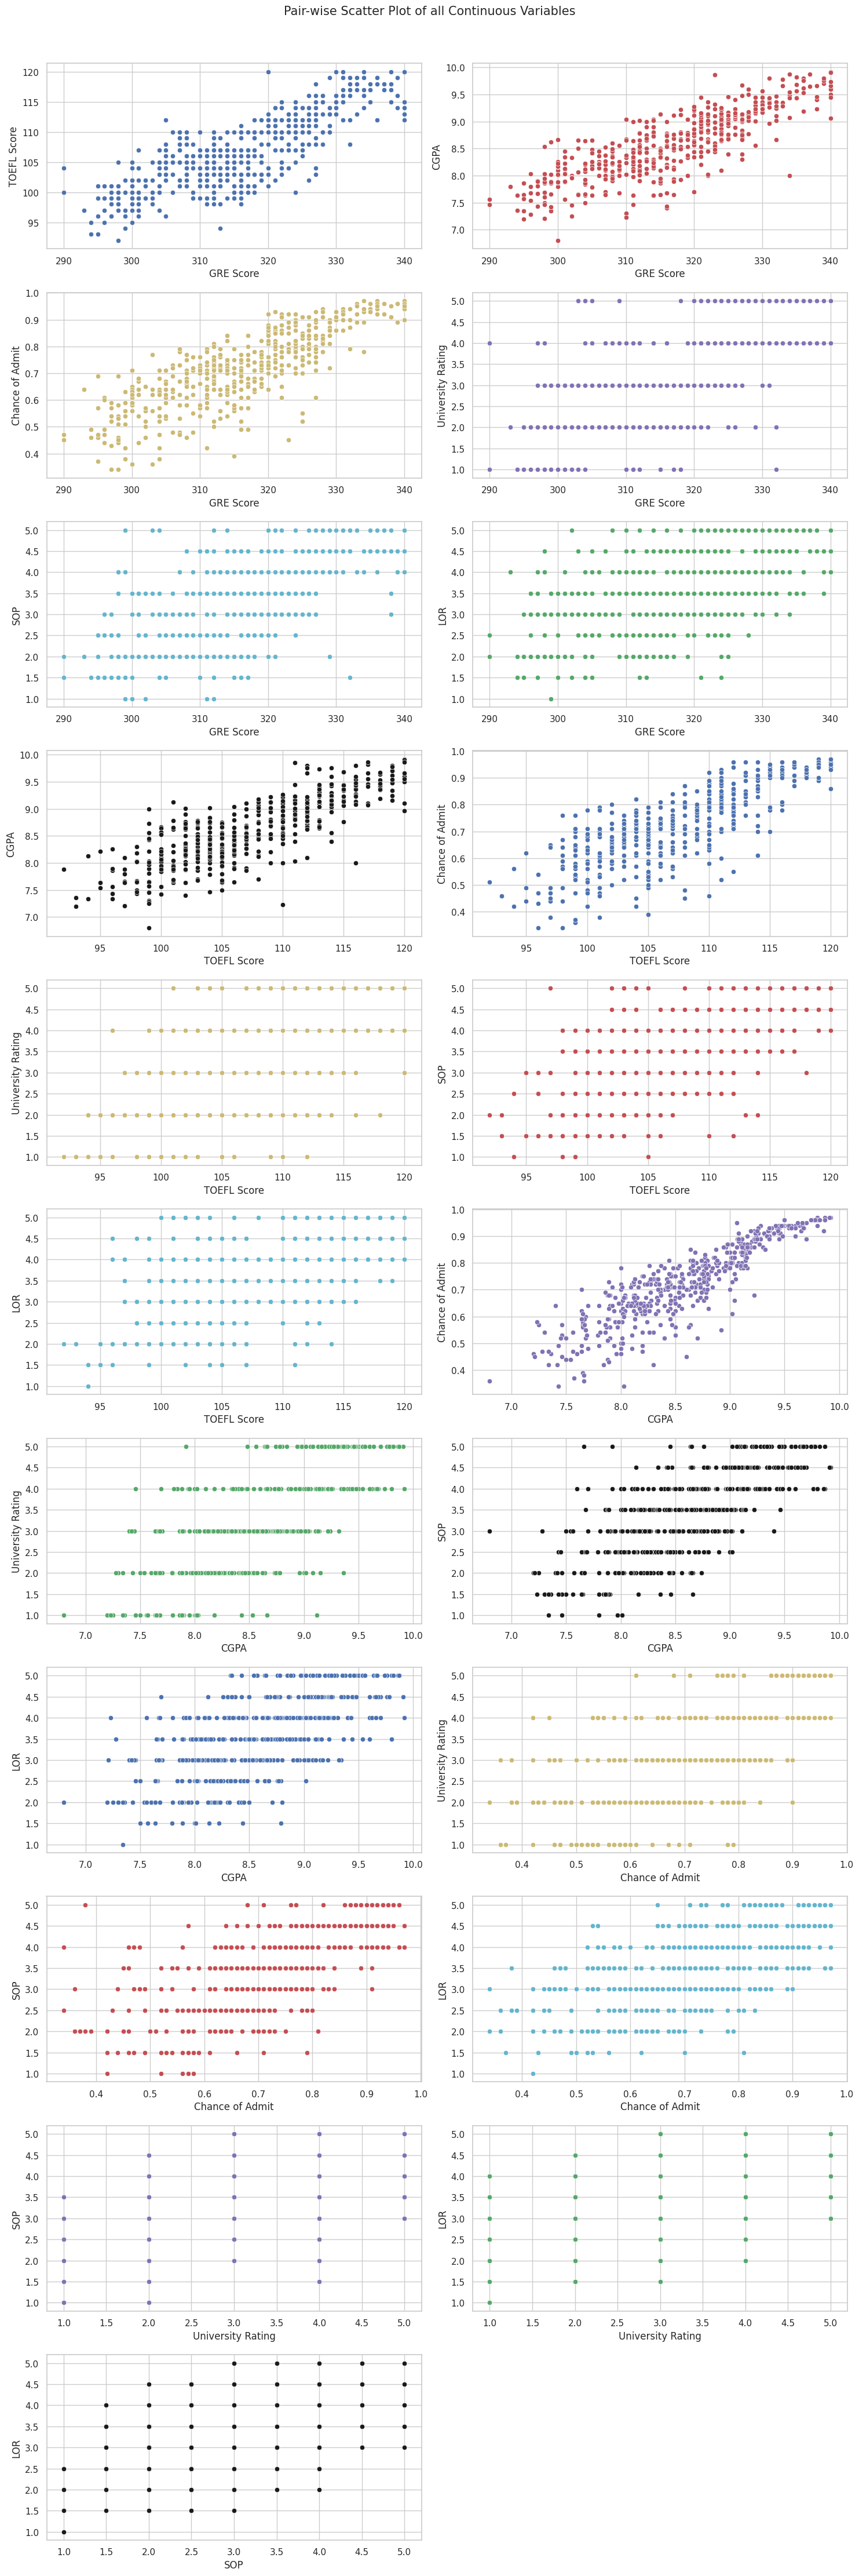

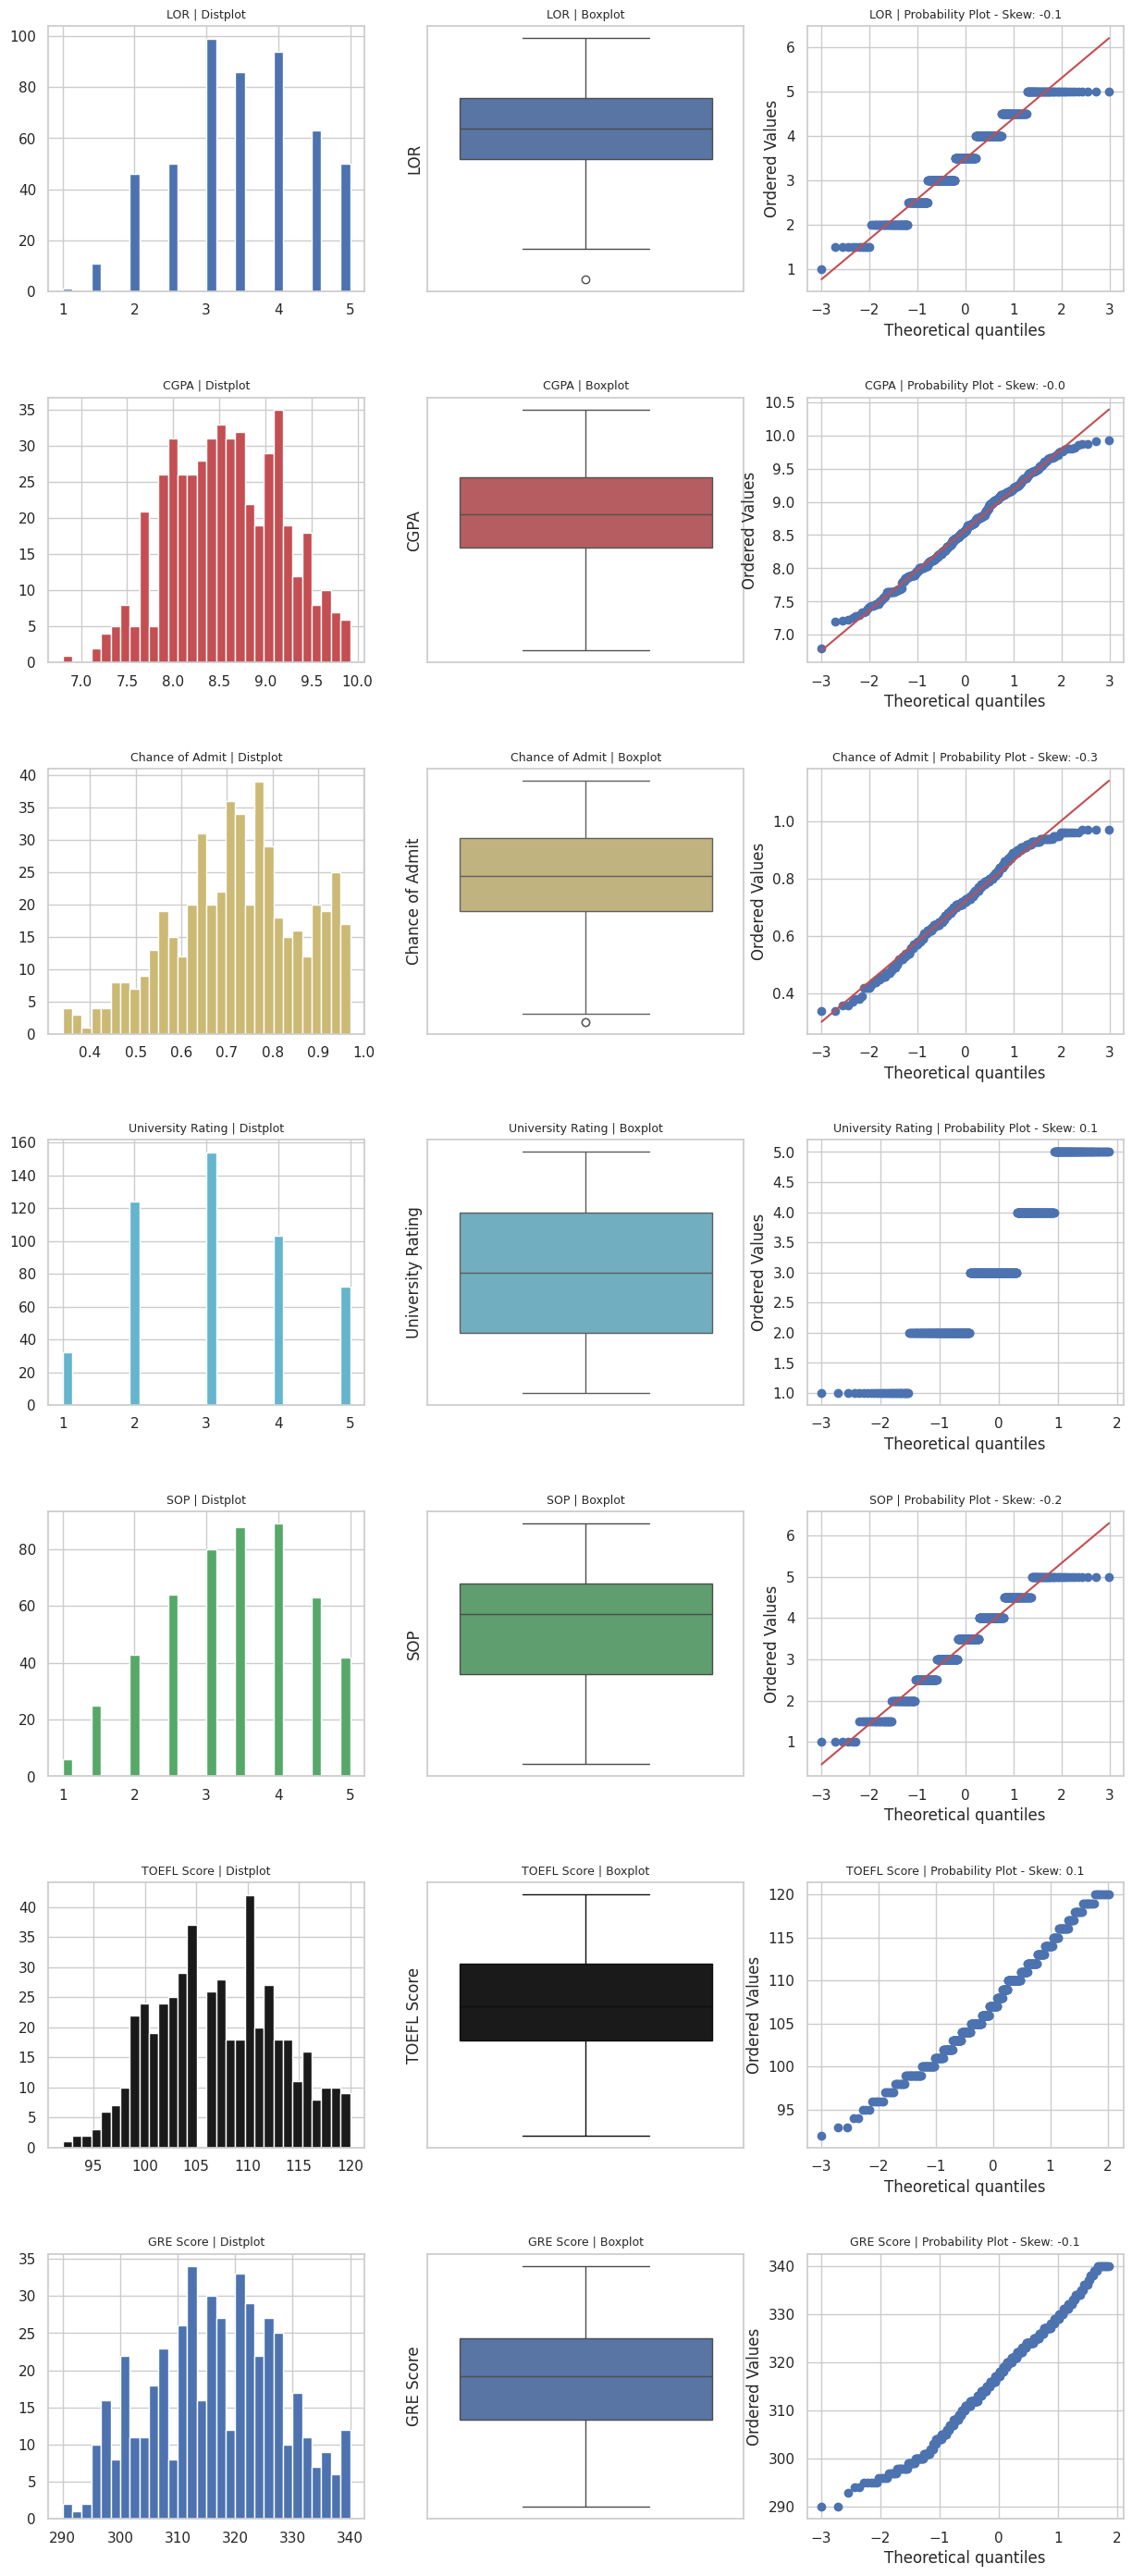

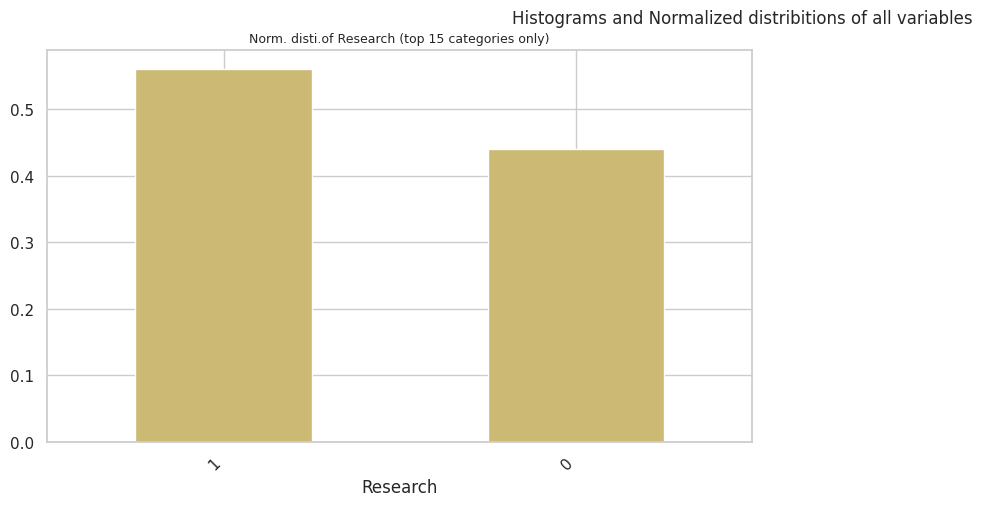

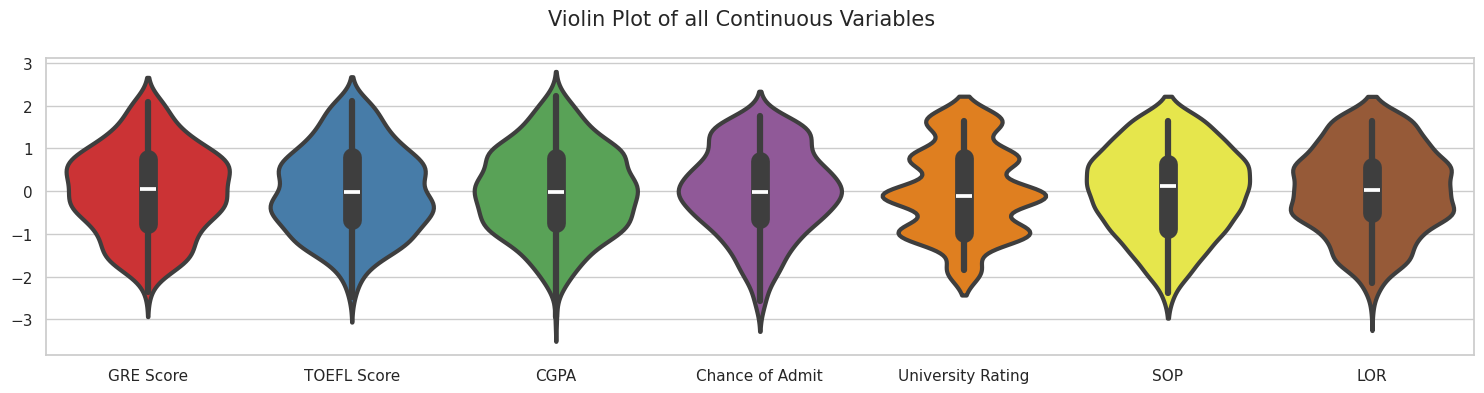

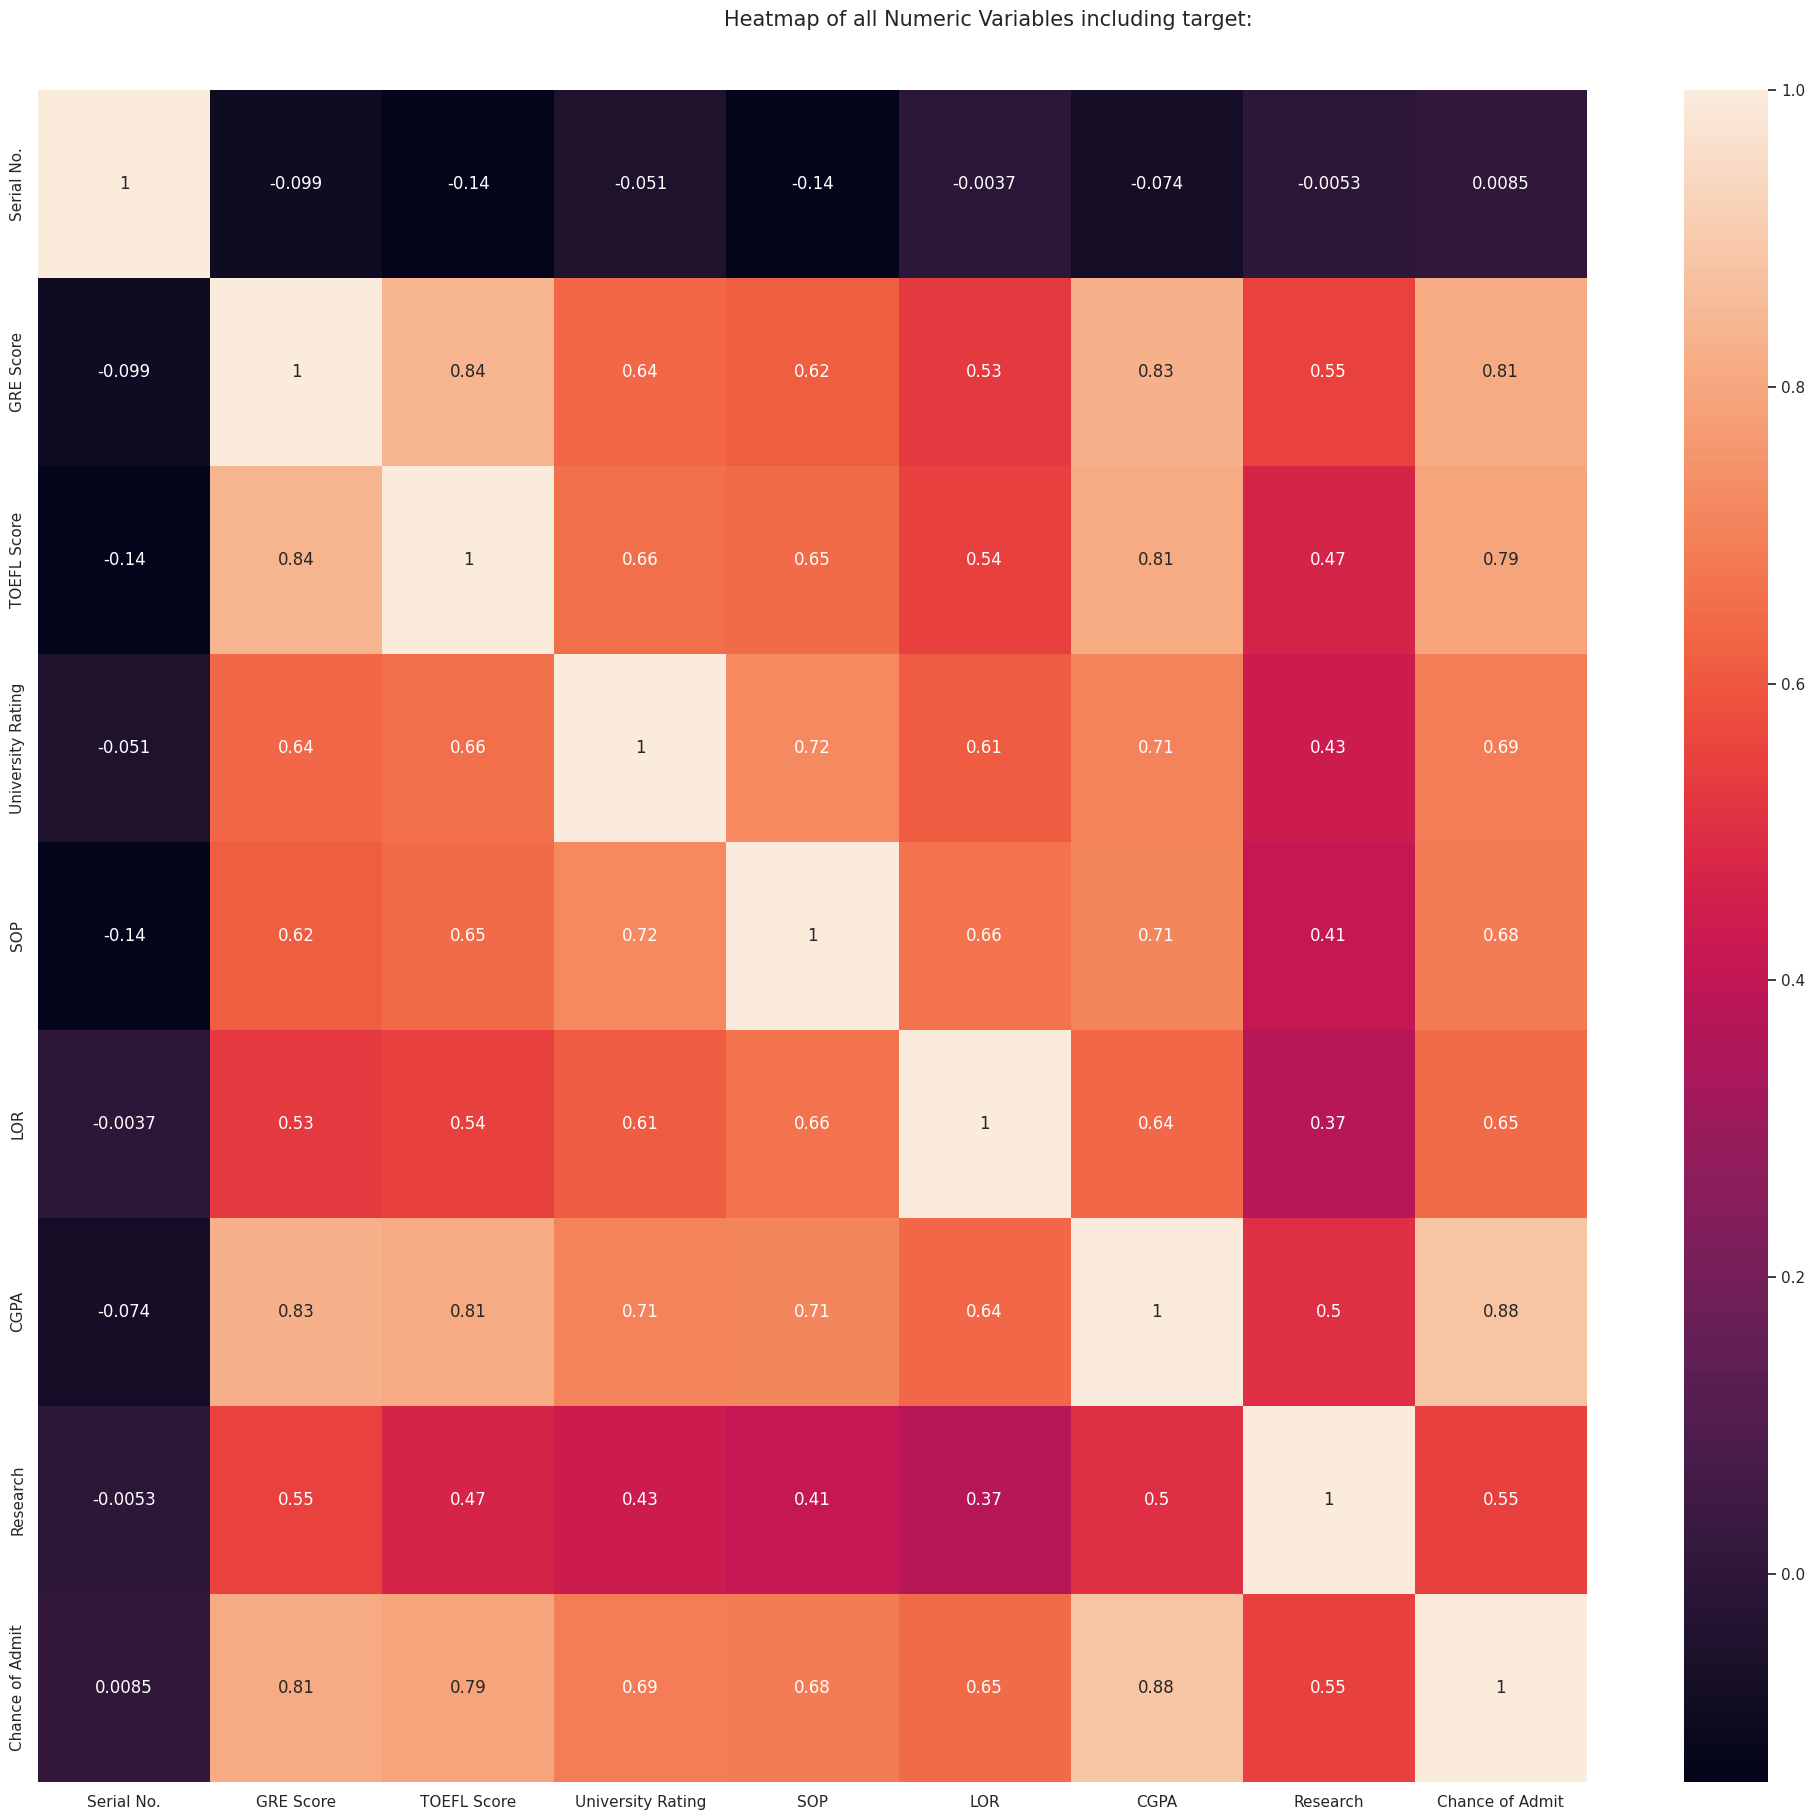

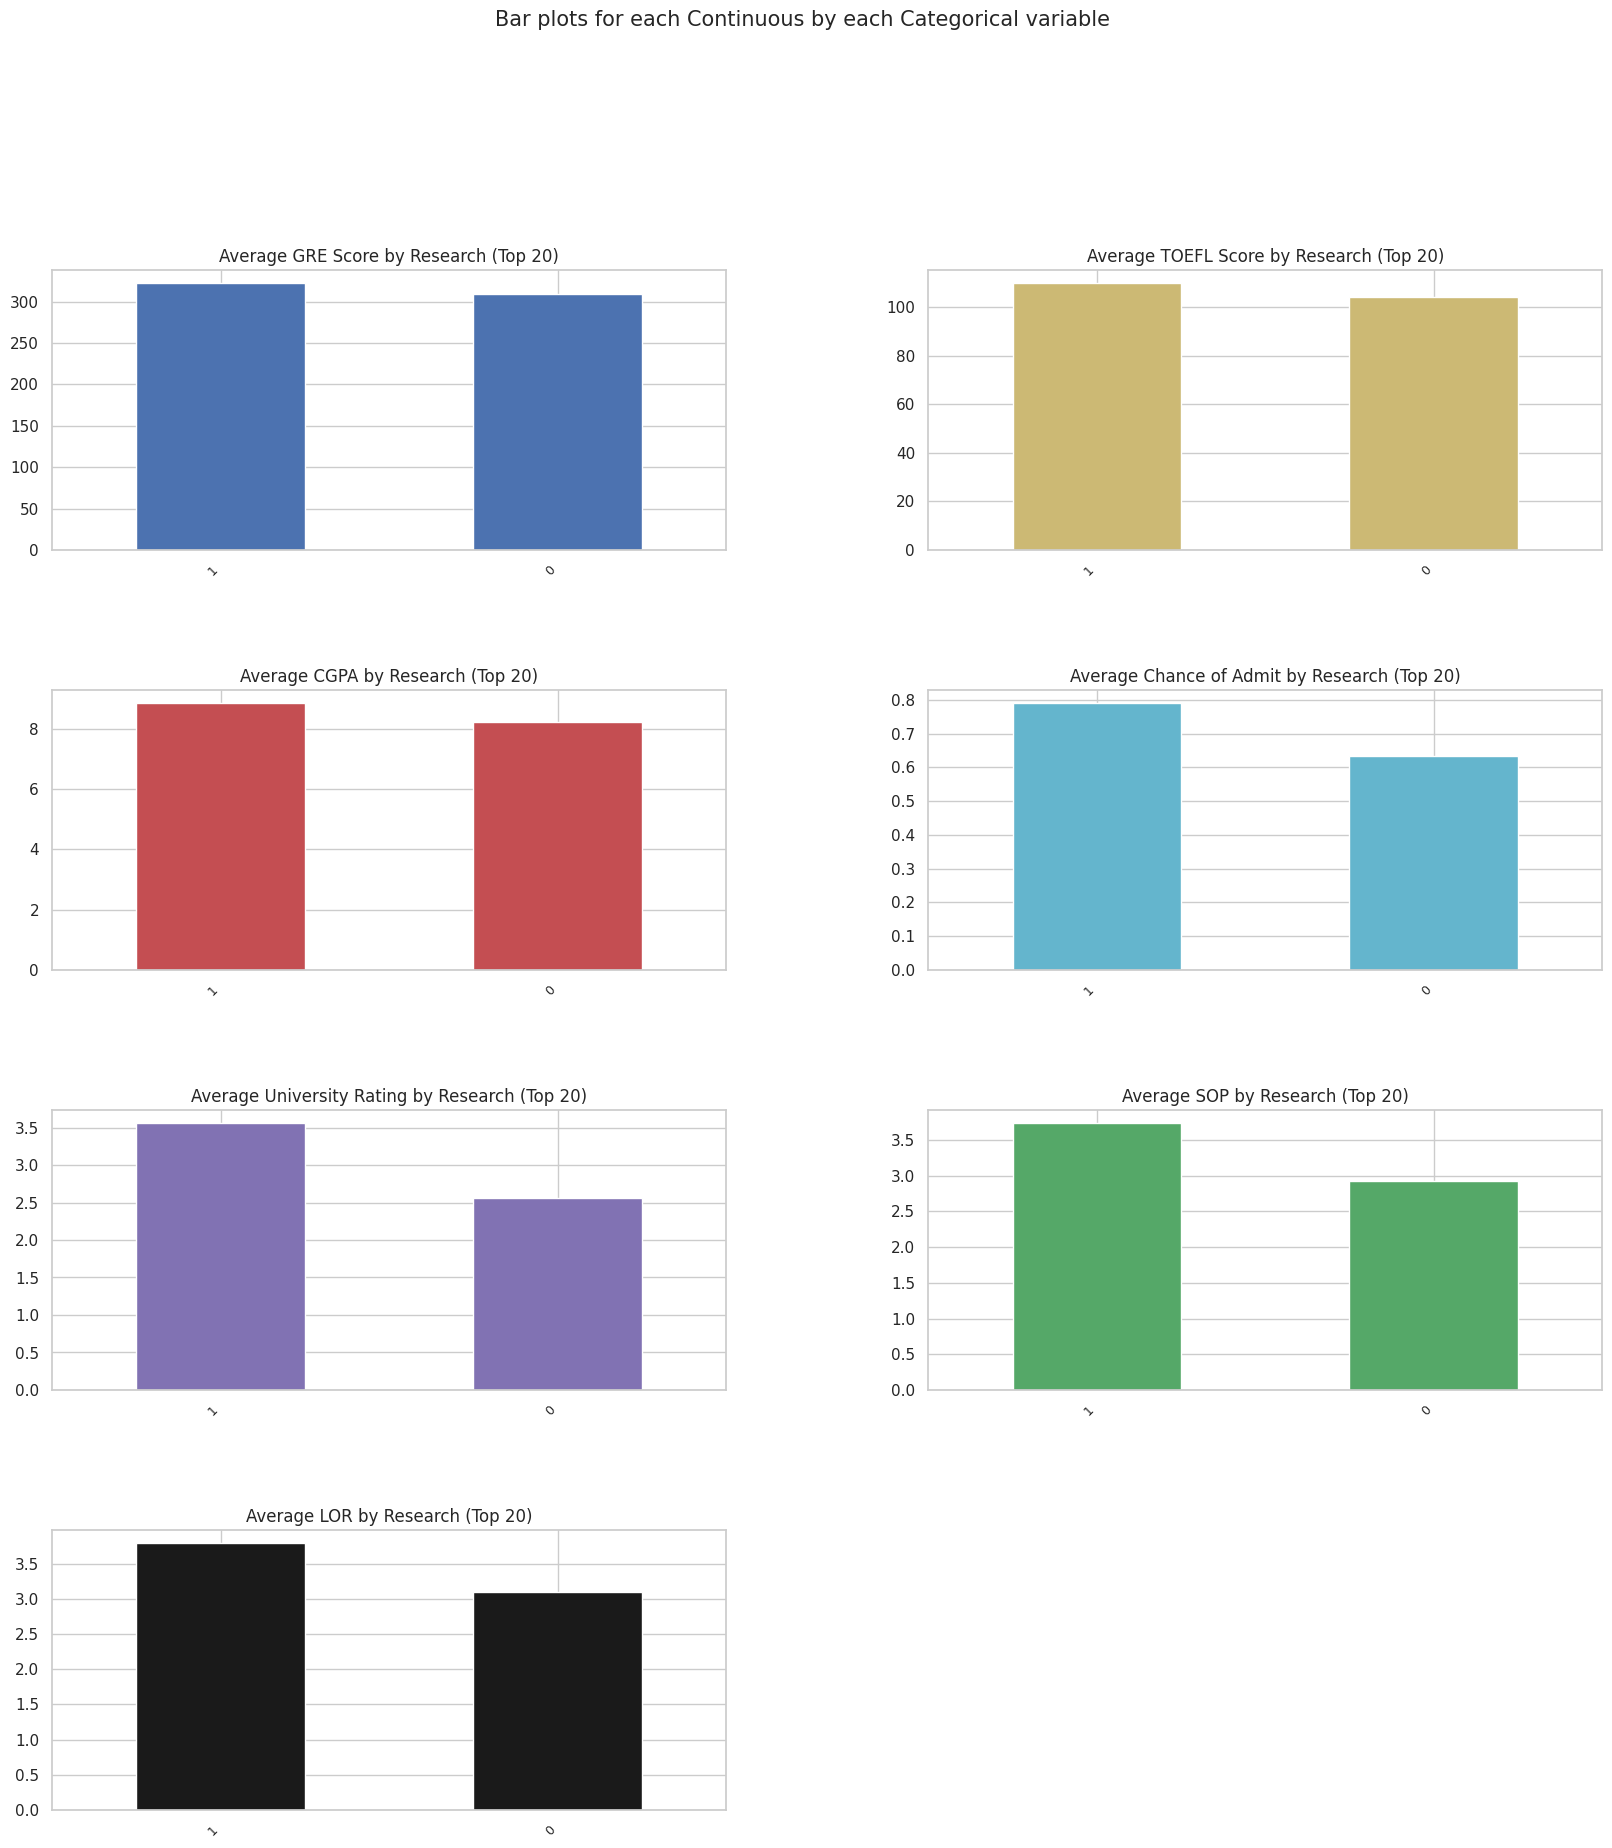

All Plots done
Time to run AutoViz = 11 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
# Graphical Analysis

AV = AutoViz_Class()
df = AV.AutoViz('Admission_Prediction.csv')

In [ ]:
# Preprocessing
# filling null values in data

admission['University_Rating'] = admission['University_Rating'].fillna(admission['University_Rating'].mode()[0])
admission['TOEFL_Score'] = admission['TOEFL_Score'].fillna(admission['TOEFL_Score'].mean())
admission['GRE_Score']  = admission['GRE_Score'].fillna(admission['GRE_Score'].mean())

In [ ]:
# checking for null values

admission.isnull().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

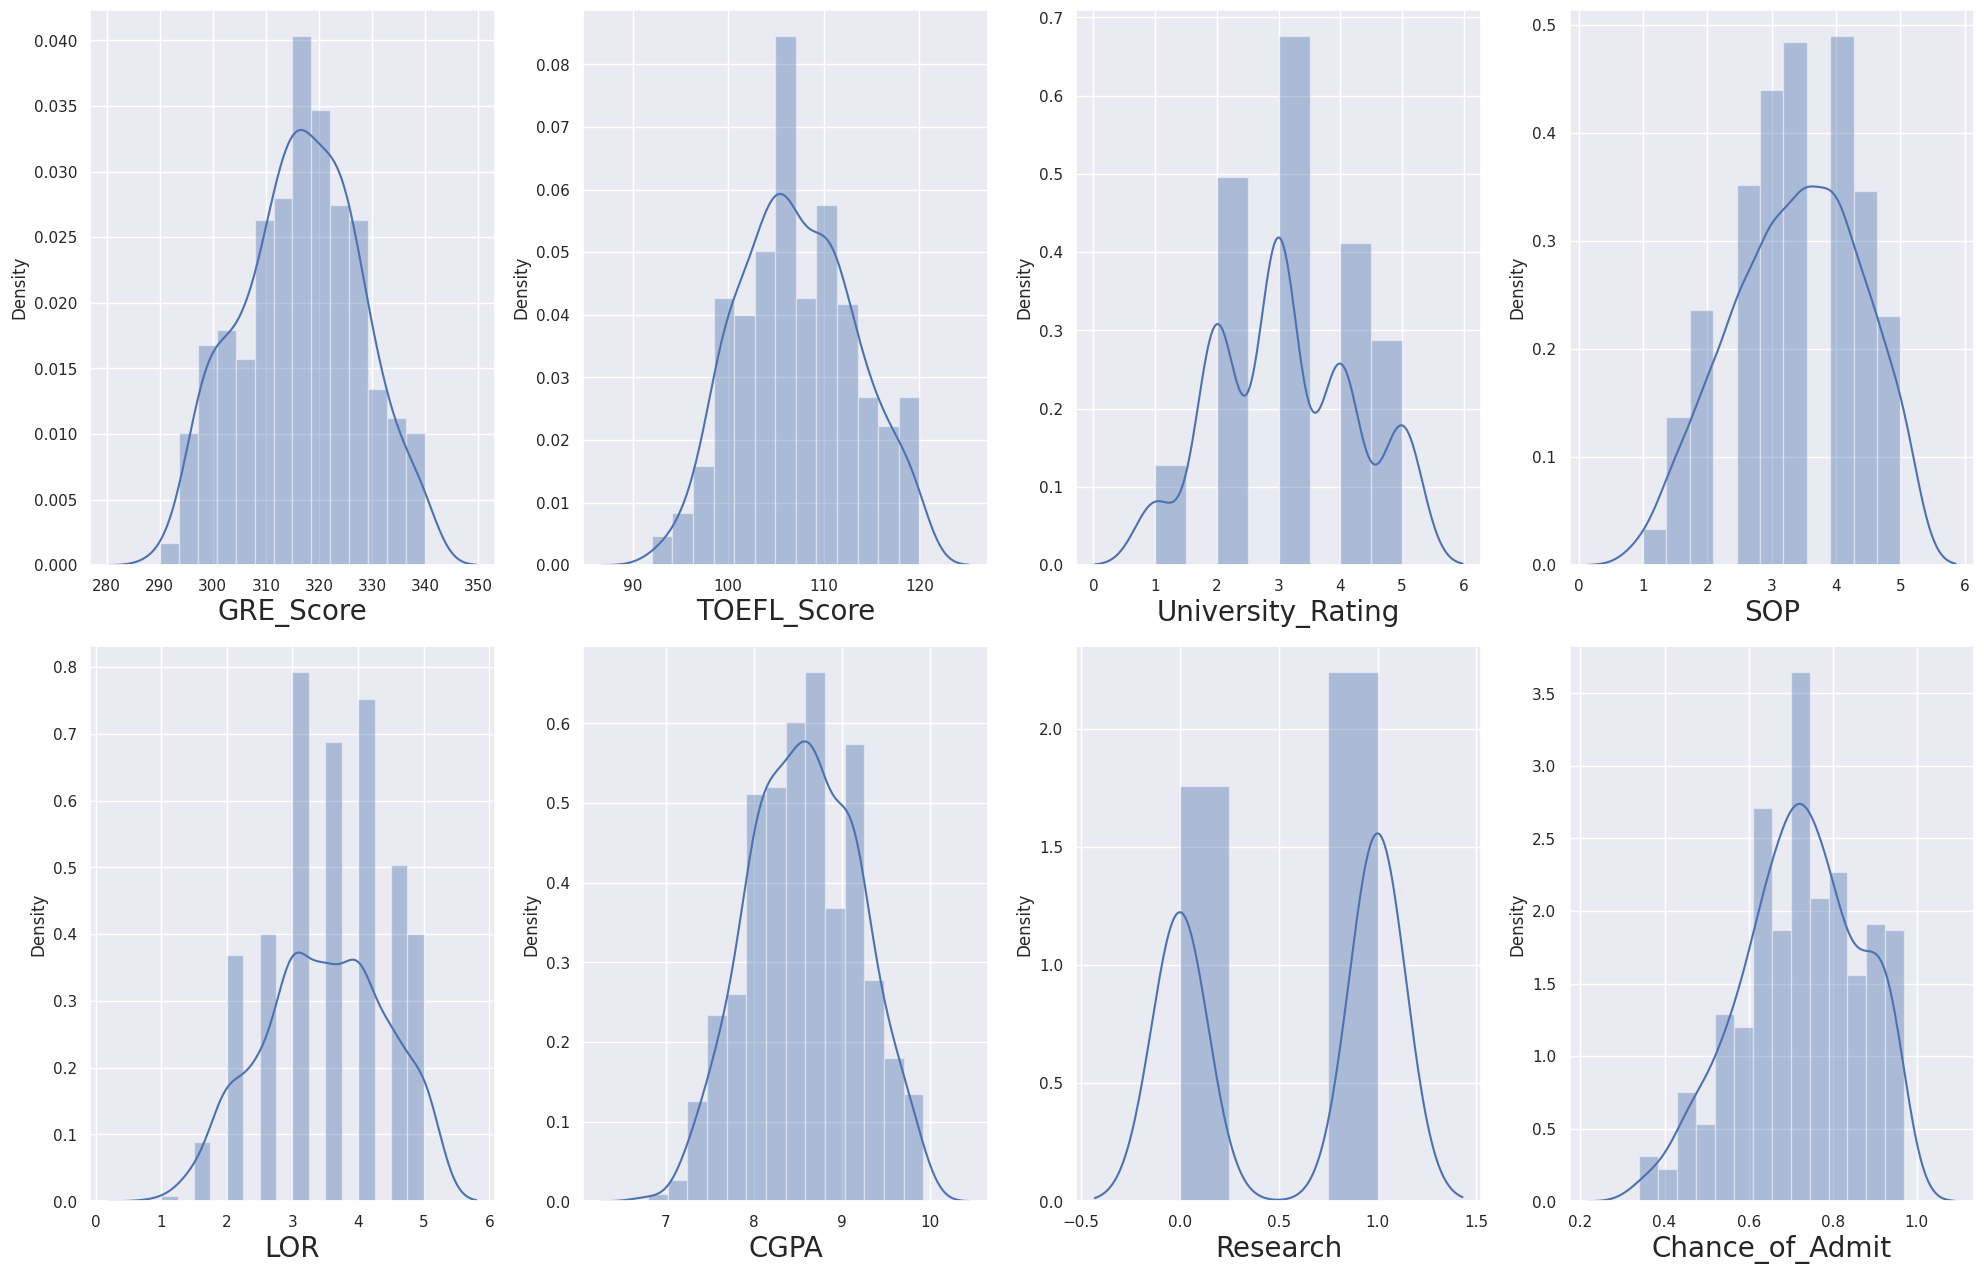

In [ ]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in admission:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(admission[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
mlr_y = admission['Chance_of_Admit']
mlr_X =admission.drop(columns = ['Chance_of_Admit'])

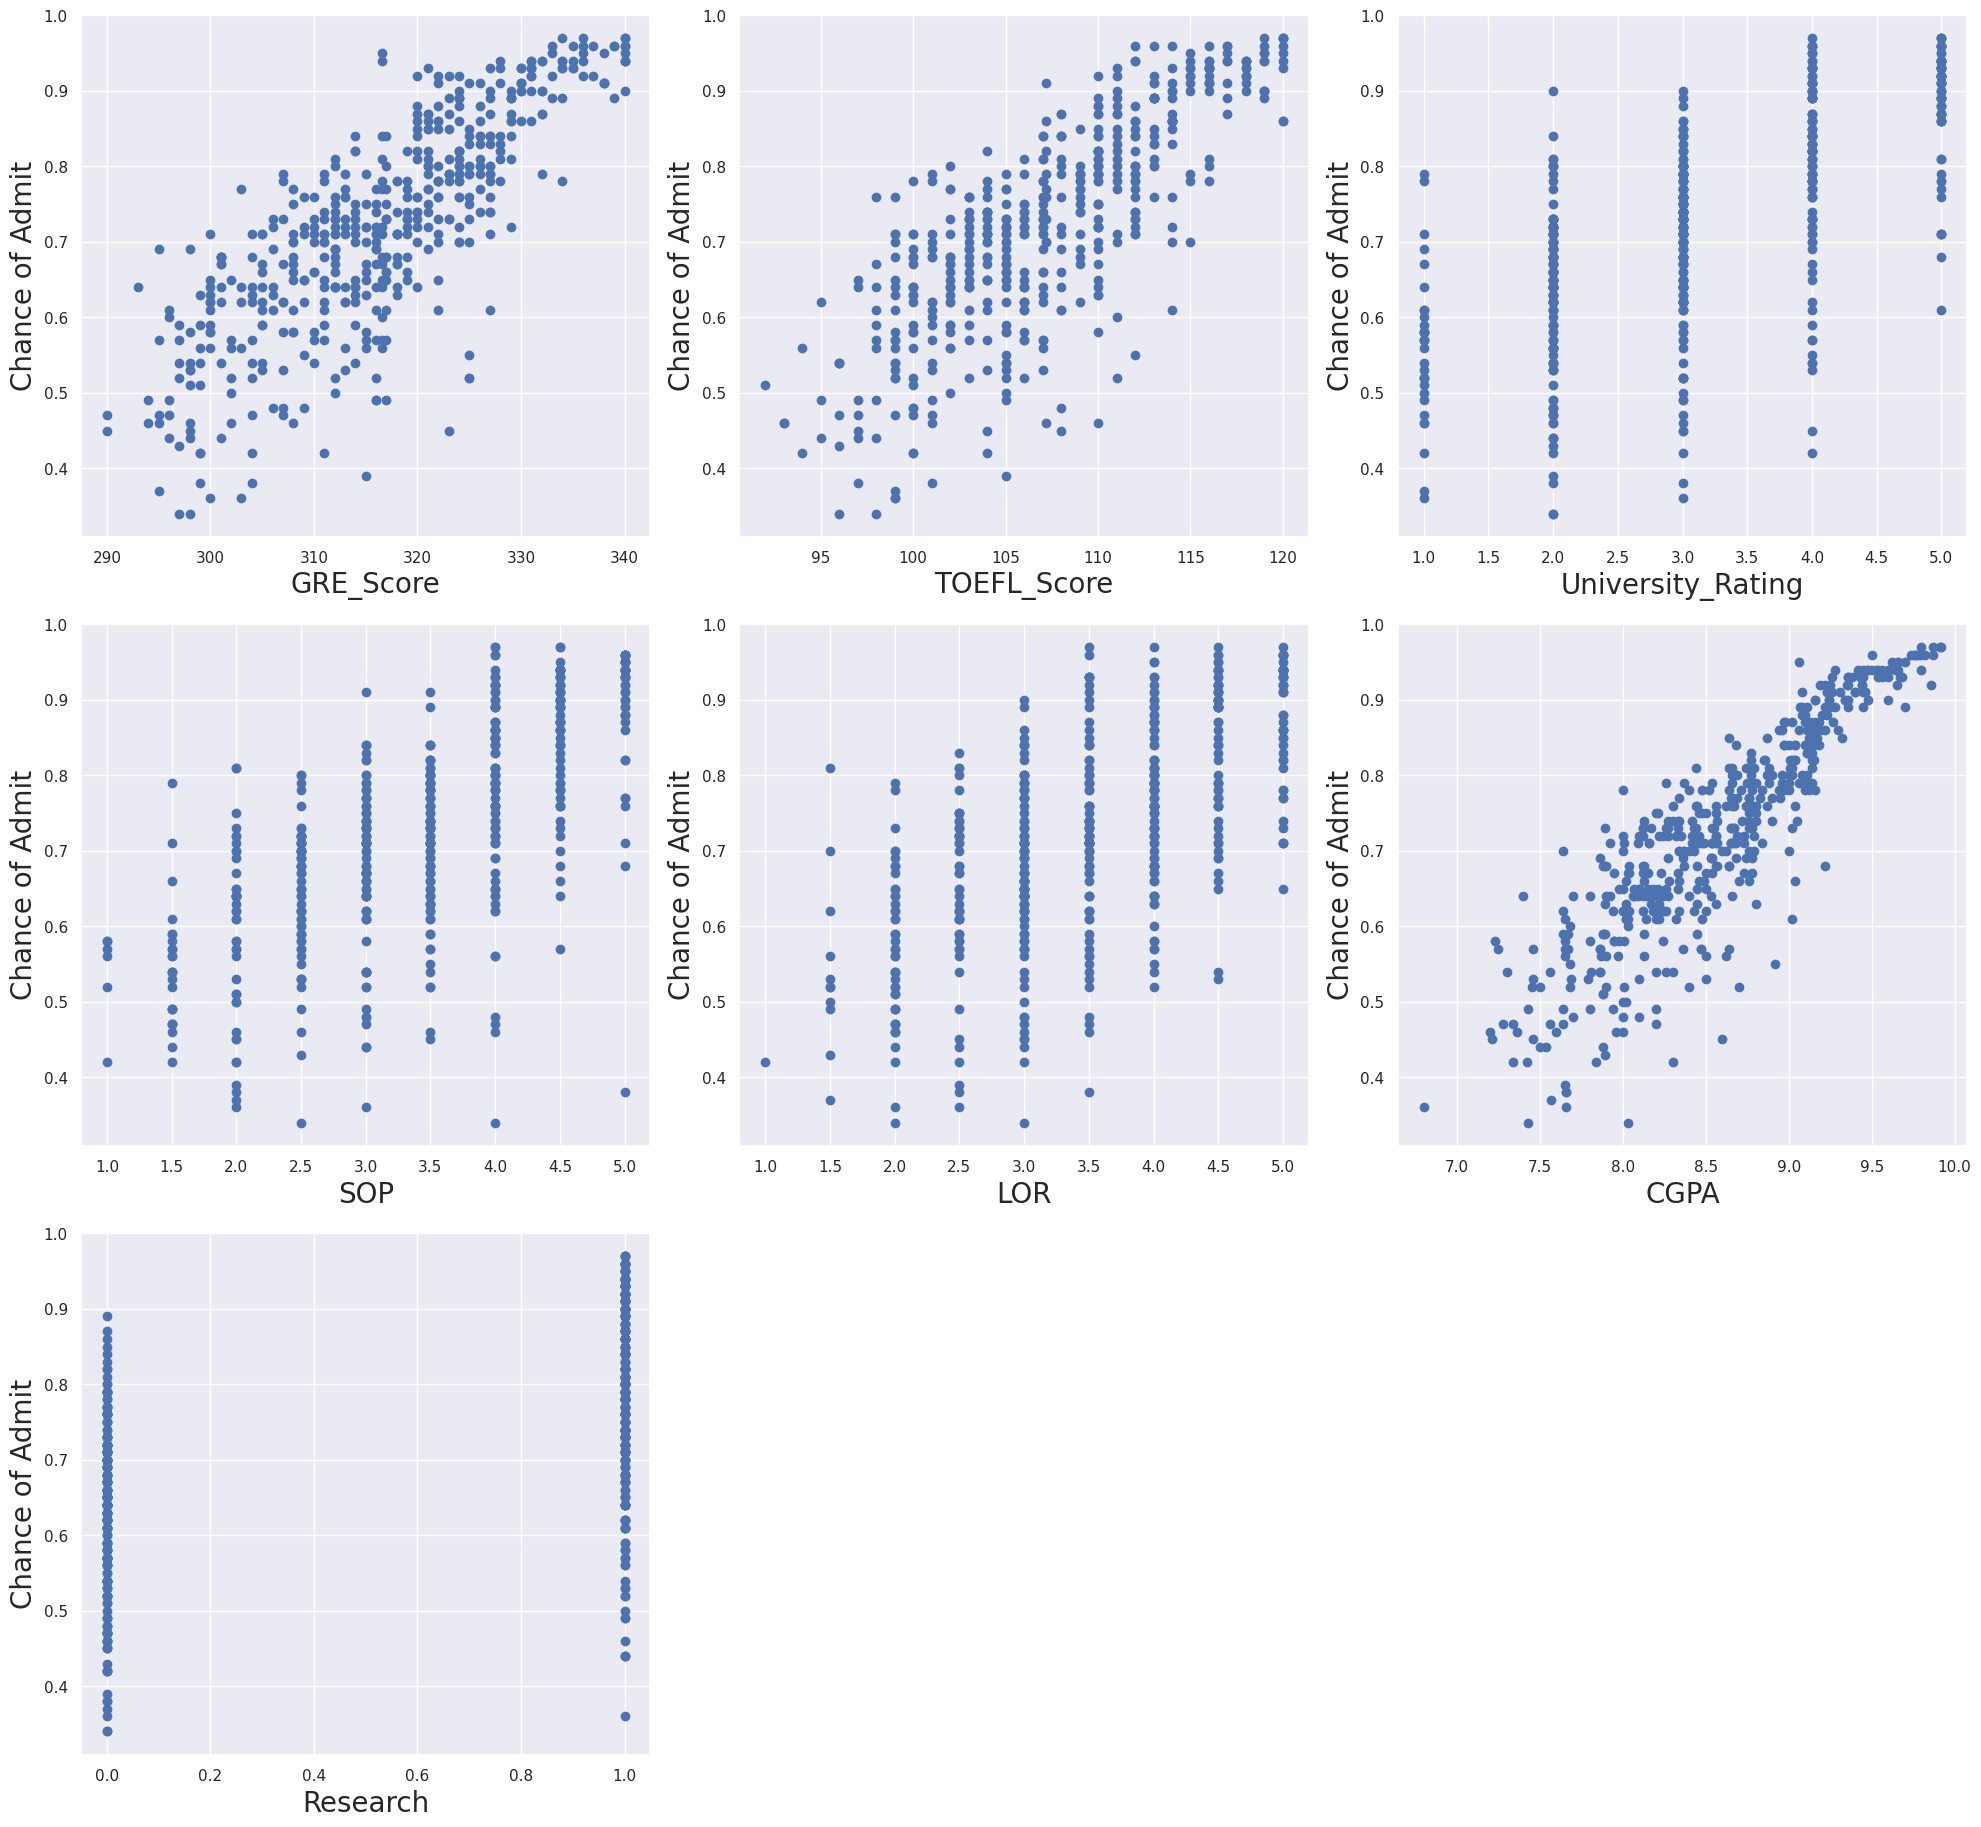

In [ ]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in mlr_X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(mlr_X[column],mlr_y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
scaler =StandardScaler()

mlr_X_scaled = scaler.fit_transform(mlr_X)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = mlr_X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = mlr_X.columns

In [ ]:
vif

,VIF,Features
0,4.152735,GRE_Score
1,3.793345,TOEFL_Score
2,2.517272,University_Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


In [ ]:
mlr_x_train,mlr_x_test,mlr_y_train,mlr_y_test = train_test_split(mlr_X_scaled,mlr_y,test_size = 0.25,random_state=29)

In [ ]:
mlr_x_train.shape, mlr_y_train.shape

((375, 7), (375,))

In [ ]:
mlr_x_test.shape, mlr_y_test.shape

((125, 7), (125,))

In [ ]:
# Model Building for multiple linear regression

mlregression = LinearRegression()
mlregression

LinearRegression()

In [ ]:
mlregression.fit(mlr_x_train,mlr_y_train)

LinearRegression()

In [ ]:
mlregression.coef_

array([0.02367989, 0.01409627, 0.00131049, 0.0040542 , 0.01509611,
       0.07650718, 0.01326595])

In [ ]:
mlregression.intercept_

0.7201049485164943

In [ ]:
# Prediction

mlr_y_pred_test = mlregression.predict(mlr_x_test)

In [ ]:
mlr_y_pred_test

array([0.78836937, 0.46745685, 0.83277629, 0.50071476, 0.47721321,
       0.91438773, 0.60377597, 0.7593458 , 0.64066176, 0.56100136,
       0.79633932, 0.95027305, 0.72389087, 0.63927217, 0.69690743,
       0.65695805, 0.92372351, 0.64838322, 0.64689508, 0.91119346,
       0.77567987, 0.51440483, 0.84866813, 0.57393846, 0.88152799,
       0.80105497, 0.66891402, 0.65942058, 0.79560206, 0.73788186,
       0.72270616, 0.82062278, 0.54954181, 0.71688174, 0.81907032,
       0.64162015, 0.92534735, 0.94057165, 0.66289898, 0.60118065,
       0.70109364, 0.85450962, 0.64430335, 0.69544201, 0.86596243,
       0.6523298 , 0.85269279, 0.85273098, 0.6245745 , 0.55148807,
       0.82201038, 0.80028243, 0.68971785, 0.82955843, 0.90066576,
       0.78801013, 0.79000625, 0.69388395, 0.61716246, 0.92321181,
       0.61853102, 0.72621365, 0.5299594 , 0.84273088, 0.7372605 ,
       0.64494006, 0.63824519, 0.86771115, 0.93808078, 0.76901991,
       0.5271698 , 0.84933345, 0.50223075, 0.86412937, 0.78168

In [ ]:
# Performance metrics

mlr_mse = mean_squared_error(mlr_y_test, mlr_y_pred_test)
mlr_mae = mean_absolute_error(mlr_y_test, mlr_y_pred_test)
mlr_rmse = np.sqrt(mse)
print(mlr_mse)
print(mlr_mae)
print(mlr_rmse)

0.003376910716330948
0.04362115142692774
3.194472431998898


In [68]:
# Rsquared

mlr_score = r2_score(mlr_y_test, mlr_y_pred_test)
print(mlr_score)

0.8036204851678692


In [69]:
# Adjusted Rsquared

1 - (1-mlr_score)*(len(mlr_y_test)-1)/(len(mlr_y_test)-mlr_x_test.shape[1]-1)

0.791871283425776

**End of Multiclass Regression**

# Lasso Regression

In [70]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(mlr_x_train, mlr_y_train)

TypeError: LassoCV.__init__() got an unexpected keyword argument 'normalize'